In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('train.csv')

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

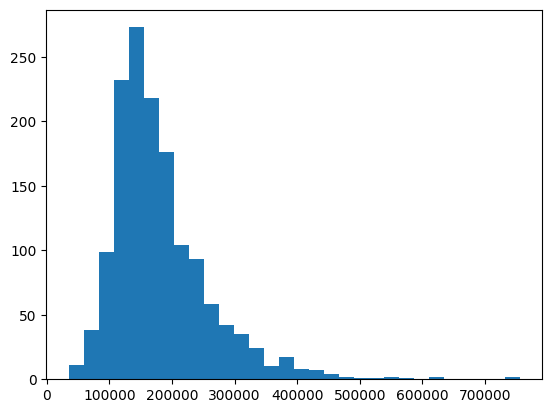

In [3]:
plt.hist(df.SalePrice, bins=30)

(array([  3.,   2.,   0.,   2.,   3.,   7.,   5.,  10.,  39.,  35.,  49.,
        100., 138., 186., 146., 156., 142., 102., 100.,  68.,  52.,  44.,
         22.,  24.,  12.,   4.,   3.,   3.,   1.,   2.]),
 array([10.46024211, 10.56271647, 10.66519084, 10.7676652 , 10.87013956,
        10.97261393, 11.07508829, 11.17756266, 11.28003702, 11.38251138,
        11.48498575, 11.58746011, 11.68993448, 11.79240884, 11.8948832 ,
        11.99735757, 12.09983193, 12.2023063 , 12.30478066, 12.40725502,
        12.50972939, 12.61220375, 12.71467812, 12.81715248, 12.91962684,
        13.02210121, 13.12457557, 13.22704994, 13.3295243 , 13.43199866,
        13.53447303]),
 <BarContainer object of 30 artists>)

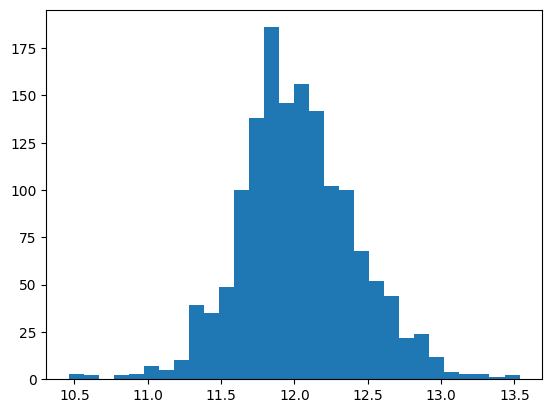

In [4]:
plt.hist(np.log(df.SalePrice), bins=30)

In [5]:
df['SalePrice'] = np.log(df['SalePrice'])

In [6]:
features = ['MSSubClass', 'OverallQual']

In [7]:
num_cols = df.describe().columns

In [8]:
sale_corr = df[num_cols].corr()['SalePrice']
features_to_use = sale_corr[sale_corr.abs() > 0.3].index

In [9]:
drop_cols = ['MasVnrArea', 'LotFrontage', 'GarageYrBlt']
features_to_use = features_to_use.drop(drop_cols)
df = df.drop(drop_cols, axis=1)

In [10]:
X = df[features_to_use].drop('SalePrice', axis=1)
y = df['SalePrice']

In [11]:
X.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf = RandomForestRegressor().fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.10618636780730774
0.15835522827302645


In [17]:
18675.4 / y_train.mean() * 100

155231.82102779916

In [18]:
print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
print(mean_squared_error(np.exp(y_test), np.exp(y_pred)) ** 0.5)

18661.473662930683
30352.459340623256
